# <center> Exploratory data analysis with Pandas

<img align="center" src="https://habrastorage.org/files/10c/15f/f3d/10c15ff3dcb14abdbabdac53fed6d825.jpg"  width=50% />

# Article outline

1. [Demonstration of main Pandas methods](#1.-Demonstration-of-main-Pandas-methods)
2. [First attempt at predicting telecom churn](#2.-First-attempt-at-predicting-telecom-churn)
3. [Demo assignment](#3.-Demo-assignment)
4. [Useful resources](#4-Useful-resources)

## 1. Demonstration of main Pandas methods
Well... There are dozens of cool tutorials on Pandas and visual data analysis. If you are already familiar with these topics, you can wait for the 3rd article in the series, where we get into machine learning.  

**[Pandas](http://pandas.pydata.org)** is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with `Matplotlib` and `Seaborn`, `Pandas` provides a wide range of opportunities for visual analysis of tabular data.

The main data structures in `Pandas` are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of `Series` instances. `DataFrames` are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

In [1]:
import pandas as pd
import numpy as np

# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

We’ll demonstrate the main methods in action by analyzing a [dataset](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) on the churn rate of telecom operator clients. Let’s read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method:


In [2]:
df = pd.read_csv('data/telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Here is the description of our features:

|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **State** | State abbreviation (like KS = Kansas) | String | Categorical |
| **Account length** | How long the client has been with the company | Numerical | Quantitative |
| **Area code** | Phone number prefix | Numerical | Categorical |
| **International plan** | International plan (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Voice mail plan** | Voicemail (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Number vmail messages** | Number of voicemail messages | Numerical | Quantitative |
| **Total day minutes** |  Total duration of daytime calls | Numerical | Quantitative |
| **Total day calls** | Total number of daytime calls  | Numerical | Quantitative |
| **Total day charge** | Total charge for daytime services | Numerical | Quantitative |
| **Total eve minutes** | Total duration of evening calls | Numerical | Quantitative |
| **Total eve calls** | Total number of evening calls | Numerical | Quantitative |
| **Total eve charge** | Total charge for evening services | Numerical | Quantitative |
| **Total night minutes** | Total duration of nighttime calls | Numerical | Quantitative |
| **Total night calls** | Total number of nighttime calls | Numerical | Quantitative |
| **Total night charge** | Total charge for nighttime services | Numerical | Quantitative |
| **Total intl minutes** | Total duration of international calls  | Numerical | Quantitative |
| **Total intl calls** | Total number of international calls | Numerical | Quantitative |
| **Total intl charge** | Total charge for international calls | Numerical | Quantitative |
| **Customer service calls** | Number of calls to customer service | Numerical | Categorical/Ordinal |

The last data column, **Churn**, is our target variable. It is binary: *True* indicates that that the company eventually lost this customer, and *False* indicates that the customer was retained. Later, we will build models that predict this feature based on the remaining features. This is why we call it a *target*.

In [3]:
df.shape

(3333, 20)

In [4]:
df['Total day charge'].head()

0    45.07
1    27.47
2    41.38
3    50.90
4    28.34
Name: Total day charge, dtype: float64

In [5]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [6]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


bool, int64, float64 and object are the data types of our features. We see that one feature is logical (bool), 3 features are of type object, and 16 features are numeric. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 3333 observations, the same number of rows we saw before with shape.

We can change the column type with the astype method. Let’s apply this method to the Churn feature to convert it into int64:

In [8]:
df['Churn'] = df['Churn'].astype('int64')

In [9]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the include parameter.



In [10]:
df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


For categorical (type object) and boolean (type bool) features we can use the value_counts method. Let’s have a look at the distribution of Churn:

In [11]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

2850 users out of 3333 are loyal; their Churn value is 0. To calculate fractions, pass normalize=True to the value_counts function.

In [12]:
df['Churn'].value_counts(normalize = True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

## Sorting

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by Total day charge (use ascending=False to sort in descending order):

In [13]:
df.sort_values('Total day charge', ascending=True).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1345,SD,98,415,No,No,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,1
1397,VT,101,510,No,No,0,0.0,0,0.00,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,0
2736,OK,127,510,No,Yes,27,2.6,113,0.44,254.0,102,21.59,242.7,156,10.92,9.2,5,2.48,3,0
2753,OH,134,415,No,No,0,7.8,86,1.33,171.4,100,14.57,186.5,80,8.39,12.9,2,3.48,2,0
1986,WI,70,415,No,No,0,7.9,100,1.34,136.4,83,11.59,156.6,89,7.05,12.1,1,3.27,0,0


We can also sort by multiple columns:



In [14]:
df.sort_values(by = ['Total day charge', 'Churn'], ascending= [False, True]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


## Indexing and retrieving data

A DataFrame can be indexed in a few different ways.

To get a single column, you can use a DataFrame['Name'] construction. Let's use this to answer a question about that column alone: what is the proportion of churned users in our dataframe?

In [15]:
df['Churn'].mean()

0.14491449144914492

4.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt.

**Boolean indexing** with one column is also very convenient. The syntax is `df[P(df['Name'])]`, where P is some logical condition that is checked for each element of the Name column. The result of such indexing is the DataFrame consisting only of rows that satisfy the P condition on the Name column.

Let’s use it to answer the question:

**What are average values of numerical features for churned users?**

In [16]:
df[df['Churn'] == 1].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

**How much time (on average) do churned users spend on the phone during daytime?**

In [17]:
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494814

**How much (on average) do churned users spend during daytime?**

In [18]:
df[df['Churn'] == 1]['Total day charge'].mean()

35.17592132505176

**What is the maximum length of international calls among loyal users (Churn == 0) who do not have an international plan?**

In [19]:
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()

18.9


DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The loc method is used for **indexing by name or label**, while iloc() is used for **indexing by number or index position**.

In the first case below, we say "give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)". In the second case, we say "give us the values of the first five rows in the first three columns" (as in a typical Python slice: the maximal value is not included).

In [20]:
df.loc[5:15, ['State','Area code', 'Churn']]

,State,Area code,Churn
5,AL,510,0
6,MA,510,0
7,MO,415,0
8,LA,408,0
9,WV,415,0
10,IN,415,1
11,RI,415,0
12,IA,408,0
13,MT,510,0
14,IA,415,0


In [21]:
df.loc[0:10, 'State':'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510
6,MA,121,510
7,MO,147,415
8,LA,117,408
9,WV,141,415


In [22]:
df.iloc[0:5, 0:5]

,State,Account length,Area code,International plan,Voice mail plan
0,KS,128,415,No,Yes
1,OH,107,415,No,Yes
2,NJ,137,415,No,No
3,OH,84,408,Yes,No
4,OK,75,415,Yes,No


If we need the first or the last line of the data frame, we can use the df[:1] or df[-1:] construct:

In [23]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


## Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use apply():**

In [24]:
df.apply(max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes         395
Total night calls           175
Total night charge        17.77
Total intl minutes           20
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

The apply method can also be used to apply a function to each row. To do this, specify axis=1. Lambda functions are very convenient in such scenarios. For example, if we need to select all states starting with T, we can do it like this:

In [25]:
df[df['State'].apply(lambda state: state[0] == 'T')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
19,TX,73,415,No,No,0,224.4,90,38.15,159.5,88,13.56,192.8,74,8.68,13.0,2,3.51,1,0
69,TX,150,510,No,No,0,178.9,101,30.41,169.1,110,14.37,148.6,100,6.69,13.8,3,3.73,4,1
84,TX,106,510,No,No,0,210.6,96,35.80,249.2,85,21.18,191.4,88,8.61,12.4,1,3.35,2,1
121,TX,41,408,No,Yes,22,213.8,102,36.35,141.8,86,12.05,142.2,123,6.40,7.2,3,1.94,0,0
128,TX,92,408,No,No,0,91.7,90,15.59,193.7,123,16.46,175.0,86,7.88,9.2,4,2.48,2,0


The map method can be used to replace values in a column by passing a dictionary of the form {old_value: new_value} as its argument:

In [26]:
d = {'No' : False, 'Yes' : True}
df['International plan'] = df['International plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Oh that did not do the trick! Okay, the same thing can be done with the replace method:

In [27]:
df = df.replace({'Voice mail plan' : d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


hmmmm! One worked and the other did not work. I'll try to figure that out later

## Grouping

In general, grouping data in Pandas works as follows:

`df.groupby(by=grouping_columns)[columns_to_show].function()`

    1. First, the groupby method divides the grouping_columns by their values. They become a new index in the resulting dataframe.
    2. Then, columns of interest are selected (columns_to_show). If columns_to_show is not included, all non groupby clauses will be included.
    3. Finally, one or several functions are applied to the obtained groups per selected columns.
    
Here is an example where we group the data according to the values of the Churn variable and display statistics of three columns in each group:

In [28]:
columns_to_show = ['Total day minutes', 'Total day calls', 
                   'Total day charge']

df.groupby(by = ['Churn', 'Voice mail plan'])[columns_to_show].describe(percentiles=[])

Total day minutes                                       \
                                  count        mean        std   min     50%   
Churn Voice mail plan                                                          
0     False                      2008.0  173.188147  48.561105   0.0  175.70   
      True                        842.0  179.915796  53.583008   2.6  182.10   
1     False                       403.0  212.934739  70.574627   0.0  228.60   
      True                         80.0  176.585000  50.839290  82.3  171.45   

                             Total day calls                               \
                         max           count        mean        std   min   
Churn Voice mail plan                                                       
0     False            310.4          2008.0  100.416335  19.786981   0.0   
      True             315.6           842.0   99.965558  19.843082  35.0   
1     False            350.8           403.0  101.354839  22.166503   0.0   
      True             322.4            80.0  101.237500  18.483139  59.0   

                                    Total day charge                        \
                         50%    max            count       mean        std   
Churn Voice mail plan                                                        
0     False            100.0  160.0           2008.0  29.442555   8.255304   
      True             101.0  163.0            842.0  30.586164   9.109155   
1     False            103.0  165.0            403.0  36.199355  11.997781   
      True             101.0  147.0             80.0  30.020375   8.643009   

                                            
                         min    50%    max  
Churn Voice mail plan                       
0     False             0.00  29.87  52.77  
      True              0.44  30.96  53.65  
1     False             0.00  38.86  59.64  
      True             13.99  29.15  54.81

Let’s do the similar thing, but slightly differently by passing a list of functions to agg():

In [29]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 
                   'Total night minutes']

df.groupby(by = ['Churn', 'Voice mail plan'])[columns_to_show].agg([np.mean, np.std, max])

Total day minutes                   Total eve minutes  \
                                   mean        std    max              mean   
Churn Voice mail plan                                                         
0     False                  173.188147  48.561105  310.4        197.485707   
      True                   179.915796  53.583008  315.6        202.757838   
1     False                  212.934739  70.574627  350.8        214.351117   
      True                   176.585000  50.839290  322.4        202.632500   

                                        Total night minutes                    
                             std    max                mean        std    max  
Churn Voice mail plan                                                          
0     False            50.273571  354.2          199.290737  50.759755  395.0  
      True             50.171390  361.8          202.142280  51.894404  381.9  
1     False            51.870759  363.7          207.613896  46.636824  354.9  
      True             50.189055  315.4          193.231250  48.078174  321.2

## Summary tables

Suppose we want to see how the observations in our sample are distributed in the context of two variables - Churn and International plan. To do so, we can build a contingency table using the crosstab method:

In [30]:
pd.crosstab(df['Churn'], df['International plan'], normalize=False)

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [31]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=False)

Voice mail plan,False,True
Churn,,
0,2008,842
1,403,80


We can see that most of the users are loyal and do not use additional services (International Plan/Voice mail).

This will resemble pivot tables to those familiar with Excel. And, of course, pivot tables are implemented in Pandas: the pivot_table method takes the following parameters:

    values – a list of variables to calculate statistics for,
    index – a list of variables to group data by,
    aggfunc – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.
    
Let’s take a look at the average number of day, evening, and night calls by area code:

In [32]:
df.pivot_table(['Total day minutes', 'Total eve minutes', 
                   'Total night minutes'], ['Area code'], aggfunc = 'mean')

,Total day minutes,Total eve minutes,Total night minutes
Area code,,,
408,177.175418,201.284248,199.214678
415,181.592628,200.652085,202.037583
510,178.787619,201.323929,200.229048


## DataFrame transformations

Like many other things in Pandas, adding columns to a DataFrame is doable in many ways.

For example, if we want to calculate the total number of calls for all users, let’s create the total_calls Series and paste it into the DataFrame:

In [33]:
total_calls = df['Total day calls'] + df['Total eve calls'] + \
              df['Total night calls'] + df['Total intl calls']
df.insert(loc=len(df.columns), column = 'Total calls', value = total_calls)
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


It is possible to add a column more easily without creating an intermediate Series instance:

In [34]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + \
                     df['Total night charge'] + df['Total intl charge']
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


To delete columns or rows, use the drop method, passing the required indexes and the axis parameter (1 if you delete columns, and nothing or 0 if you delete rows). The inplace argument tells whether to change the original DataFrame. With inplace=False, the drop method doesn't change the existing DataFrame and returns a new one with dropped rows or columns. With inplace=True, it alters the DataFrame.

In [35]:
# get rid of just created columns
df.drop(['Total charge', 'Total calls'], axis=1, inplace=True) 
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [36]:
# and here’s how you can delete rows
df.drop([1, 2]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


## First attempt at predicting telecom churn

Let's see how churn rate is related to the International plan feature. We’ll do this using a crosstab contingency table and also through visual analysis with Seaborn (however, visual analysis will be covered more thoroughly in the next article).

In [37]:
pd.crosstab(df['Churn'], df['International plan'], margins=True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [6]:
# some imports to set up plotting 
import matplotlib.pyplot as plt
# pip install seaborn 
import seaborn as sns

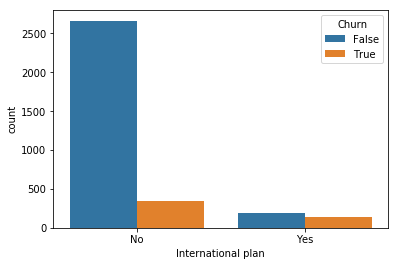

In [7]:
sns.countplot(x='International plan', hue='Churn', data=df);

We see that, with International Plan, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

Next, let’s look at another important feature – Customer service calls. Let’s also make a summary table and a picture.

In [8]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


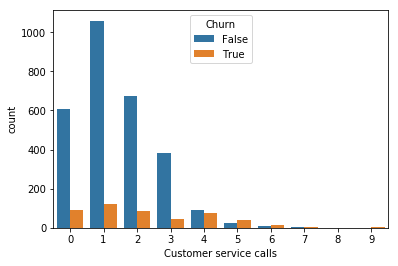

In [9]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

Although it's not so obvious from the summary table, it's easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above.

Now let's add a binary feature to our DataFrame – Customer service calls > 3. And once again, let's see how it relates to churn.

In [10]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')

pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn,False,True,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


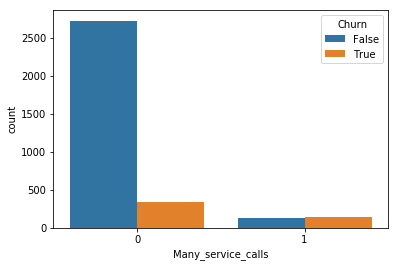

In [11]:
sns.countplot(x='Many_service_calls', hue='Churn', data=df);

Let’s construct another contingency table that relates Churn with both International plan and freshly created Many_service_calls.

In [12]:
pd.crosstab(df['Many_service_calls'] & df['International plan'] , df['Churn'])

Churn,False,True
row_0,,
False,2721,345
True,129,138


Therefore, predicting that a customer is not loyal (Churn=1) in the case when the number of calls to the service center is greater than 3 and the International Plan is added (and predicting Churn=0 otherwise), we might expect an accuracy of 85.8% (we are mistaken only 464 + 9 times). This number, 85.8%, that we got through this very simple reasoning serves as a good starting point (baseline) for the further machine learning models that we will build.

As we move on in this course, recall that, before the advent of machine learning, the data analysis process looked something like this. Let's recap what we've covered:

- The share of loyal clients in the sample is 85.5%. The most naive model that always predicts a "loyal customer" on such data will guess right in about 85.5% of all cases. That is, the proportion of correct answers (accuracy) of subsequent models should be no less than this number, and will hopefully be significantly higher;

- With the help of a simple forecast that can be expressed by the following formula: "International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0", we can expect a guessing rate of 85.8%, which is just above 85.5%. Subsequently, we'll talk about decision trees and figure out how to find such rules automatically based only on the input data;

- We got these two baselines without applying machine learning, and they’ll serve as the starting point for our subsequent models. If it turns out that with enormous effort, we increase the share of correct answers by 0.5% per se, then possibly we are doing something wrong, and it suffices to confine ourselves to a simple model with two conditions;

- Before training complex models, it is recommended to manipulate the data a bit, make some plots, and check simple assumptions. Moreover, in business applications of machine learning, they usually start with simple solutions and then experiment with more complex ones.

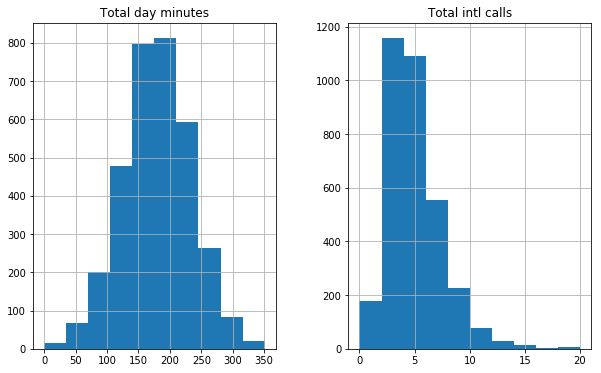

In [13]:
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(10, 6));

## Univariate visualization

*Univariate* analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the *distribution of its values* and ignore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.

#### Quantitative features

*Quantitative features* take on ordered numerical values. Those values can be *discrete*, like integers, or *continuous*, like real numbers, and usually express a count or a measurement.

##### Histograms and density plots

The easiest way to take a look at the distribution of a numerical variable is to plot its *histogram* using the `DataFrame`'s method [`hist()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html).

A histogram groups values into *bins* of equal value range. The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential, etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type (most often Gaussian).

In the above plot, we see that the variable *Total day minutes* is normally distributed, while *Total intl calls* is prominently skewed right (its tail is longer on the right).

There is also another, often clearer, way to grasp the distribution: *density plots* or, more formally, *Kernel Density Plots*. They can be considered a [smoothed](https://en.wikipedia.org/wiki/Kernel_smoother) version of the histogram. Their main advantage over the latter is that they do not depend on the size of the bins. Let's create density plots for the same two variables:

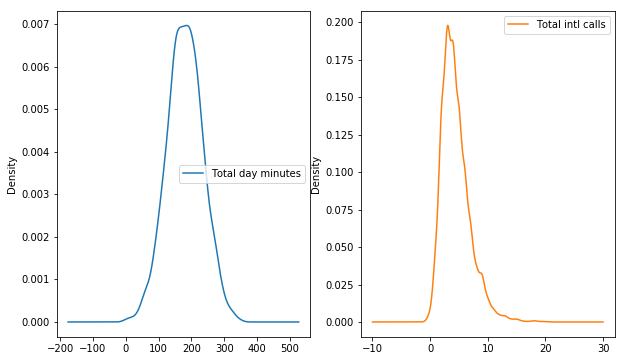

In [14]:
df[features].plot(kind='density', subplots=True, layout=(1, 2),
                   sharex=False, figsize=(10, 6));

It is also possible to plot a distribution of observations with seaborn's distplot(). For example, let's look at the distribution of Total day minutes. By default, the plot displays both the histogram with the kernel density estimate (KDE) on top.

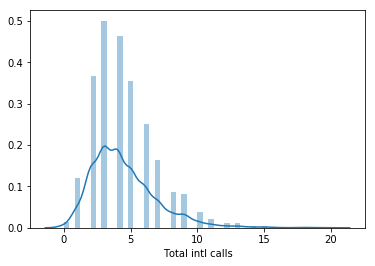

In [15]:
sns.distplot(df['Total intl calls']);

The height of the histogram bars here is normed and shows the density rather than the number of examples in each bin.

## Box plot

Another useful type of visualization is a box plot. seaborn does a great job here:

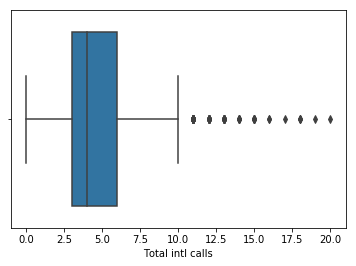

In [16]:
sns.boxplot(df['Total intl calls']);

Let's see how to interpret a box plot. Its components are a box (obviously, this is why it is called a box plot), the so-called whiskers, and a number of individual points (outliers).

The box by itself illustrates the interquartile spread of the distribution; its length is determined by the 25th(Q1) and 75th(Q3) percentiles. The vertical line inside the box marks the median (50%) of the distribution.

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval (Q1−1.5⋅IQR,Q3+1.5⋅IQR), where IQR=Q3−Q1 is the interquartile range.

Outliers that fall outside of the range bounded by the whiskers are plotted individually as black points along the central axis.

We can see that a large number of international calls is quite rare in our data.

Violin plot
The last type of distribution plots that we will consider is a violin plot.

Look at the figures below. On the left, we see the already familiar box plot. To the right, there is a violin plot with the kernel density estimate on both sides.

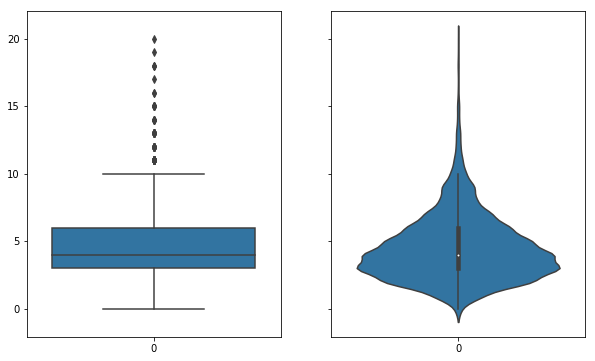

In [17]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 6))
sns.boxplot(data=df['Total intl calls'], ax=axes[0]);
sns.violinplot(data=df['Total intl calls'], ax=axes[1]);

The difference between the box and violin plots is that the former illustrates certain statistics concerning individual examples in a dataset while the violin plot concentrates more on the smoothed distribution as a whole.

In our case, the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

## describe()

In addition to graphical tools, in order to get the exact numerical statistics of the distribution, we can use the method describe() of a DataFrame:

In [18]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


Its output is mostly self-explanatory. 25%, 50% and 75% are the corresponding percentiles.

## Categorical and binary features

Categorical features take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a category, which reflects some qualitative property of this example. Binary variables are an important special case of categorical variables when the number of possible values is exactly 2. If the values of a categorical variable are ordered, it is called ordinal.

## Frequency table

Let’s check the class balance in our dataset by looking at the distribution of the target variable: the churn rate. First, we will get a frequency table, which shows how frequent each value of the categorical variable is. For this, we will use the value_counts() method:

In [19]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

By default, the entries in the output are sorted from the most to the least frequently-occurring values.

In our case, the data is not balanced; that is, our two target classes, loyal and disloyal customers, are not represented equally in the dataset. Only a small part of the clients canceled their subscription to the telecom service. As we will see in the following articles, this fact may imply some restrictions on measuring the classification performance, and, in the future, we may want to additionaly penalize our model errors in predicting the minority "Churn" class.

## Bar plot

The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the seaborn's function countplot(). There is another function in seaborn that is somewhat confusingly called barplot() and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature.

Let's plot the distributions for two categorical variables:

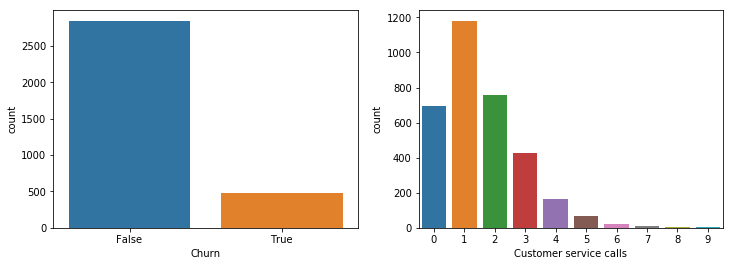

In [20]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=df, ax=axes[0]);
sns.countplot(x='Customer service calls', data=df, ax=axes[1]);

While the histograms, discussed above, and bar plots may look similar, there are several differences between them:

    1. Histograms are best suited for looking at the distribution of numerical variables while bar plots are used for categorical features.
    2. The values on the X-axis in the histogram are numerical; a bar plot can have any type of values on the X-axis: numbers, strings, booleans.
    3. The histogram's X-axis is a Cartesian coordinate axis along which values cannot be changed; the ordering of the bars is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, when we consider ordinal variables (like Customer service calls in our data), the bars are usually ordered by variable value.
    
The left chart above vividly illustrates the imbalance in our target variable. The bar plot for Customer service calls on the right gives a hint that the majority of customers resolve their problems in maximum 2–3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. It may well be that the tail of that bar plot contains most of our churn. These are just hypotheses for now, so let's move on to some more interesting and powerful visual techniques.

## Multivariate visualization

Multivariate plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

### Quantitative vs. Quantitative
#### Correlation matrix

Let's look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method corr() on a DataFrame that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to heatmap() from seaborn, which renders a color-coded matrix for the provided values:

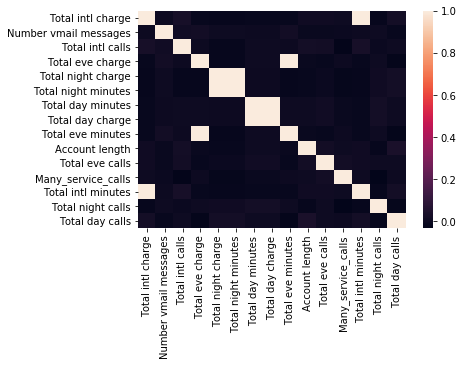

In [21]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

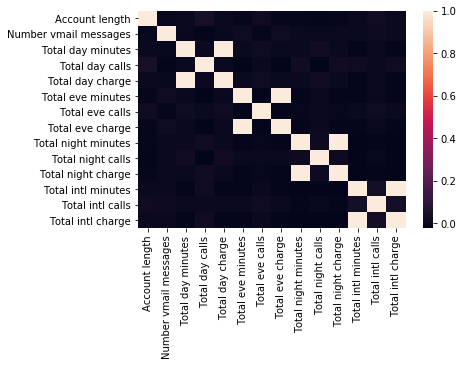

In [24]:
# Drop non-numerical variables
numerical = ['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge']

data = pd.read_csv('data/telecom_churn.csv', usecols = numerical)
# Calculate and plot
corr_matrix = data[numerical].corr()
sns.heatmap(corr_matrix);

From the colored correlation matrix generated above, we can see that there are 4 variables such as Total day charge that have been calculated directly from the number of minutes spent on phone calls (Total day minutes). These are called dependent variables and can therefore be left out since they do not contribute any additional information. Let's get rid of them:

In [25]:
numerical = list(set(numerical) - 
                 set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))

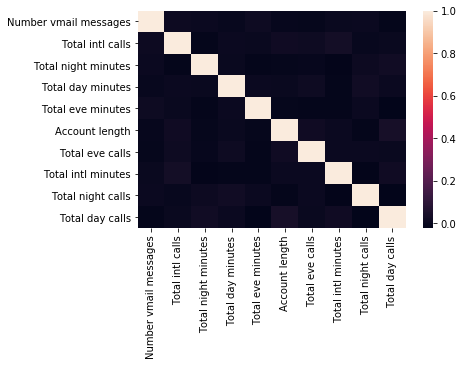

In [27]:
data = pd.read_csv('data/telecom_churn.csv', usecols = numerical)
# Calculate and plot
corr_matrix = data[numerical].corr()
sns.heatmap(corr_matrix);

### Scatter plot

The scatter plot displays values of two numerical variables as Cartesian coordinates in 2D space. Scatter plots in 3D are also possible.

Let's try out the function scatter() from the matplotlib library:

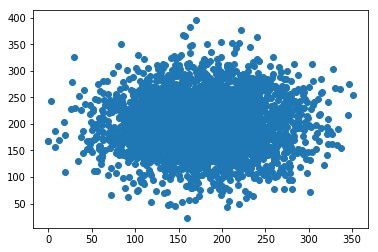

In [28]:
plt.scatter(df['Total day minutes'], df['Total night minutes']);